# <div id="container" style="position:relative;">
<div style="float:left"><h1> Capstone: BreastCancerUltrasound </h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://drive.google.com/uc?export=view&id=1EnB0x-fdqMp6I5iMoEBBEuxB_s7AmE2k" />
</div>
</div>

**Name: Ali Razi**

**Contact: ali.razi9292@gmail.com**

**Date: 08-09-2023**

---

Ultrasound imaging plays a crucial role in breast cancer diagnosis, and by harnessing the power of machine learning (ML), we can significantly enhance its capabilities. This technology serves as a valuable tool to improve accuracy and automate image analysis, leading to early cancer detection before metastasis occurs. By employing AI and ML techniques, radiologists can benefit from reduced false-positive results in breast ultrasound interpretation, thereby facilitating more reliable diagnoses.

In this Jupyter notebook, our project focuses on utilizing machine learning for measuring tumor mass in breast cancer patients, particularly during the early diagnostic process. We will explore various ML algorithms and techniques to develop a robust model capable of accurately estimating tumor mass from ultrasound images.

- Let's Import Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from tensorflow.keras.preprocessing import image
import os
import pathlib
import random
import cv2


2023-07-26 23:46:14.715918: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


---

 - Let's sanity check of single image to undrestand the basic parameters of data, before loading all dataset:


In [2]:
#Sanity check of single image:
img = plt.imread('/Users/alirazi/BreastCancerUltrasound/data/ultrasound breast classification/train/benign/benign (36)-rotated1-rotated2.png')

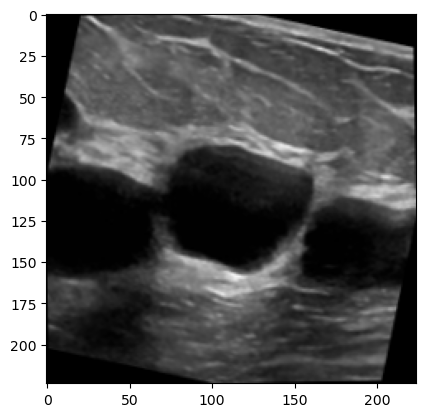

In [3]:
plt.imshow(img)
plt.show()

 - Defining data_dir:

In [23]:
path_train = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound breast classification/train"
data_dir = pathlib.Path(path_train)

In [24]:
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['.DS_Store', 'benign', 'malignant', 'resized_benign',
       'resized_malignant'], dtype='<U17')

 - Counting the number of PNG image files in a directory:

In [25]:
Count_Imag = len(list(data_dir.glob('*/*.png')))
Count_Imag

14704

- Counting number of each rows for each directory:

In [26]:
from PIL import Image

def count_rows(directory):
    image_paths = [os.path.join(directory, filename) for filename in os.listdir(directory) if filename.endswith(".png")]
    total_rows = 0
    
    for image_path in image_paths:
        with Image.open(image_path) as img:
            width, height = img.size
            total_rows += height
    
    return total_rows

directory_benign = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound breast classification/train/benign"
directory_malignant = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound breast classification/train/malignant"

rows_benign = count_rows(directory_benign)

rows_malignant = count_rows(directory_malignant)

print("Benign Images:")
print(f"Total Rows: {rows_benign}")

print("\nMalignant Images:")
print(f"Total Rows: {rows_malignant}")


Benign Images:
Total Rows: 742202

Malignant Images:
Total Rows: 905984


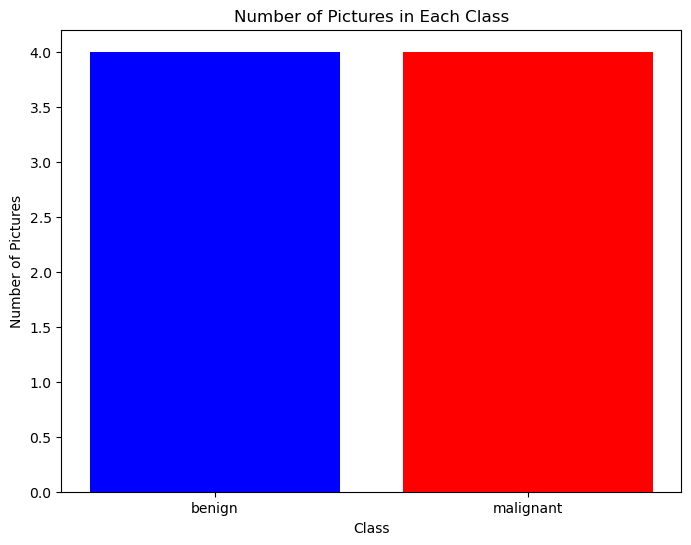

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Class': ['benign', 'benign', 'malignant', 'benign', 'malignant', 'benign', 'malignant', 'malignant'],
}

df = pd.DataFrame(data)

class_counts = df['Class'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values, color=['blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Number of Pictures')
plt.title('Number of Pictures in Each Class')
plt.show()


In [28]:
benign_folder = '/Users/alirazi/BreastCancerUltrasound/data/ultrasound breast classification/train/benign'
malignant_folder = '/Users/alirazi/BreastCancerUltrasound/data/ultrasound breast classification/train/malignant'


In [29]:
image_data = []
class_labels = []


In [30]:
data = {'Image': image_data, 'Class': class_labels}
df = pd.DataFrame(data)


In [31]:
import os
import pandas as pd
from PIL import Image

benign_folder = '/Users/alirazi/BreastCancerUltrasound/data/ultrasound breast classification/train/benign'
malignant_folder = '/Users/alirazi/BreastCancerUltrasound/data/ultrasound breast classification/train/malignant'

image_data = []
class_labels = []

for filename in os.listdir(benign_folder):
    image_path = os.path.join(benign_folder, filename)
    with Image.open(image_path) as image:  # Use a context manager to close the file after reading
        image_data.append(image)
        class_labels.append('benign')

for filename in os.listdir(malignant_folder):
    image_path = os.path.join(malignant_folder, filename)
    with Image.open(image_path) as image:  # Use a context manager to close the file after reading
        image_data.append(image)
        class_labels.append('malignant')

data = {'Image': image_data, 'Class': class_labels}
df = pd.DataFrame(data)


# Cleaning The Data

For having better vision and perspective of data it woulb better to do sanity check and modify data. There are several key steps that for machine learning sanity chehck and data modification befire EDA is needed:

                                    1. Validity 
                                    2. Accuracy
                                    3.Completness
                                    4.Consistency
                                    5.Uniformity

**1.Validity:**

    - To check the validity of data(PNG), it needs to go through several steps, the following will take care of 
      datas' validity

**1.Resizng the Data:**

    - In this step we can make all images and data in the same size, therefore, for the furthur we do not face 
    the challenge like ,,,, that causes becuases data in the various and multiple sizes.

In [32]:
from PIL import Image
import os

desired_width = 300
desired_height = 200

def resize_images(input_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for filename in os.listdir(input_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            input_path = os.path.join(input_dir, filename)
            output_path = os.path.join(output_dir, filename)

            image = Image.open(input_path)

            resized_image = image.resize((desired_width, desired_height), Image.ANTIALIAS)

            resized_image.save(output_path)

input_benign_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound breast classification/train/benign"
output_benign_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound breast classification/train/resized_benign/"
resize_images(input_benign_directory, output_benign_directory)

input_malignant_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound breast classification/train/malignant/"
output_malignant_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound breast classification/train/resized_malignant/"
resize_images(input_malignant_directory, output_malignant_directory)


/var/folders/f6/pqrp7l4d7qb79_yxqsqcx7vw0000gn/T/ipykernel_937/2471704323.py:18: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_image = image.resize((desired_width, desired_height), Image.ANTIALIAS)


In [34]:
import os
import cv2

desired_width = 300
desired_height = 200

def resize_images(input_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for filename in os.listdir(input_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            input_path = os.path.join(input_dir, filename)
            output_path = os.path.join(output_dir, filename)

       
            image = cv2.imread(input_path)

            
            resized_image = cv2.resize(image, (desired_width, desired_height), interpolation=cv2.INTER_AREA)

            cv2.imwrite(output_path, resized_image)

input_benign_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound breast classification/train/benign/"
output_benign_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound breast classification/train/resized_benign/"
resize_images(input_benign_directory, output_benign_directory)

input_malignant_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound breast classification/train/malignant/"
output_malignant_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound breast classification/train/resized_malignant/"
resize_images(input_malignant_directory, output_malignant_directory)


**2.Veryfing the albaling of two categoreis of begingn and malignant:**

    - Here there are two sets of data, 'Benign' and 'Malignant'. To make sure that data are labaled properly it can run brloe cide nad check that is all labels corrctly attributed to its images or not.

Random sample from the 'benign' class:


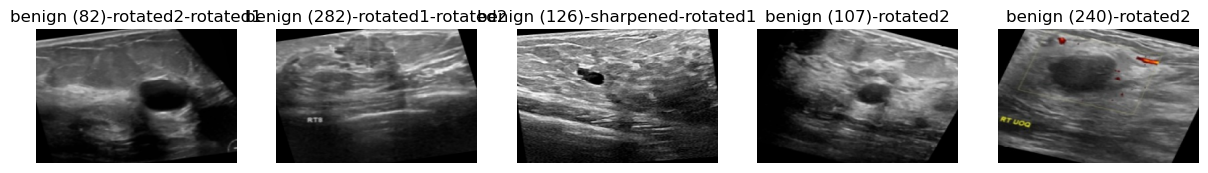


Random sample from the 'malignant' class:


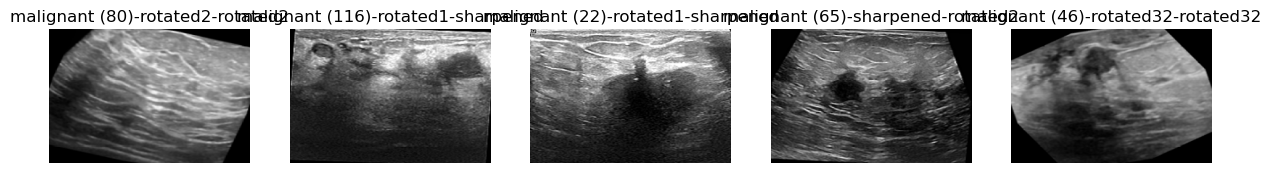

In [35]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_random_sample(folder_path, num_samples=5):
    image_files = os.listdir(folder_path)
    random_samples = random.sample(image_files, num_samples)
    
    plt.figure(figsize=(15, 5))
    for i, filename in enumerate(random_samples):
        image_path = os.path.join(folder_path, filename)
        image = mpimg.imread(image_path)
        
        plt.subplot(1, num_samples, i+1)
        plt.imshow(image)
        plt.title(filename.split('.')[0])
        plt.axis('off')
    
    plt.show()

resized_benign_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound breast classification/train/resized_benign/"
resized_malignant_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound breast classification/train/resized_malignant/"

num_samples_to_display = 5
print("Random sample from the 'benign' class:")
display_random_sample(resized_benign_directory, num_samples_to_display)

print("\nRandom sample from the 'malignant' class:")
display_random_sample(resized_malignant_directory, num_samples_to_display)


**3.Augmenting the data :**

    - To have better and proper dataset it would be better to make nad augument that dataset and data of that dataset into various roattion and shrpness.

In [30]:
from PIL import Image, ImageOps
import os

desired_width = 300
desired_height = 200

def augment_images(input_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for filename in os.listdir(input_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            input_path = os.path.join(input_dir, filename)
            output_path = os.path.join(output_dir, filename)

            image = Image.open(input_path)

            resized_image = image.resize((desired_width, desired_height), Image.ANTIALIAS)

            resized_image.save(output_path)

            for angle in [90, 180, 270]:  
                rotated_image = resized_image.rotate(angle)
                rotated_output_path = os.path.join(output_dir, f"rotated_{angle}_{filename}")
                rotated_image.save(rotated_output_path)

            flipped_image = ImageOps.flip(resized_image)  
            flipped_output_path = os.path.join(output_dir, f"flipped_{filename}")
            flipped_image.save(flipped_output_path)

input_benign_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound breast classification/train/resized_benign/"
output_benign_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound breast classification/train/augmented_benign/"
augment_images(input_benign_directory, output_benign_directory)

input_malignant_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound breast classification/train/resized_malignant/"
output_malignant_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound breast classification/train/augmented_malignant/"
augment_images(input_malignant_directory, output_malignant_directory)


/var/folders/f6/pqrp7l4d7qb79_yxqsqcx7vw0000gn/T/ipykernel_837/2030624688.py:22: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_image = image.resize((desired_width, desired_height), Image.ANTIALIAS)


KeyboardInterrupt: 

**Checking number of each data in each category**

In [36]:
import os

def count_images_in_folder(folder_path):
    num_images = len([filename for filename in os.listdir(folder_path) if filename.endswith(".jpg") or filename.endswith(".png")])
    return num_images

resized_benign_directory =   "/Users/alirazi/BreastCancerUltrasound/data/ultrasound breast classification/train/resized_benign/"
resized_malignant_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound breast classification/train/resized_malignant/"
num_benign_images = count_images_in_folder(resized_benign_directory)
num_malignant_images = count_images_in_folder(resized_malignant_directory)

print(f"Number of images in the 'benign' class: {num_benign_images}")
print(f"Number of images in the 'malignant' class: {num_malignant_images}")


Number of images in the 'benign' class: 4074
Number of images in the 'malignant' class: 4042


**Checking for labels:**

In [43]:
import os

training_data_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound breast classification/train"

def get_class_labels(directory):
    class_labels = []
    for subdirectory in os.listdir(directory):
        if os.path.isdir(os.path.join(directory, subdirectory)):
            class_labels.append(subdirectory)
    return class_labels

class_labels = get_class_labels(training_data_directory)

if "benign" in class_labels and "malignant" in class_labels:
    print("Both 'benign' and 'malignant' labels are present.")
else:
    print("One or both of the labels 'benign' and 'malignant' are missing.")


Both 'benign' and 'malignant' labels are present.


**Checking consistency in image dimensions**

    - Good dataset is dataset that each class of that data, 'Beningn' and 'Malignant', contributed of data with have consistensy ib their image diminssions.

In [37]:
from PIL import Image
import os

def get_image_dimensions(image_path):
    try:
        with Image.open(image_path) as img:
            width, height = img.size
        return width, height
    except Exception as e:
        print(f"Failed to process {image_path}: {str(e)}")
        return None, None

def verify_image_dimensions(folder_path):
    image_files = [filename for filename in os.listdir(folder_path) if filename.endswith(".jpg") or filename.endswith(".png")]
    first_image_path = os.path.join(folder_path, image_files[0])
    first_width, first_height = get_image_dimensions(first_image_path)

    if first_width is None or first_height is None:
        return False

    for filename in image_files[1:]:
        image_path = os.path.join(folder_path, filename)
        width, height = get_image_dimensions(image_path)

        if width is None or height is None or (width, height) != (first_width, first_height):
            return False

    return True

resized_benign_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound breast classification/train/resized_benign/"
resized_malignant_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound breast classification/train/resized_malignant/"

is_benign_dimensions_valid = verify_image_dimensions(resized_benign_directory)
is_malignant_dimensions_valid = verify_image_dimensions(resized_malignant_directory)

if is_benign_dimensions_valid:
    print("Image dimensions are consistent in the 'benign' class.")
else:
    print("Image dimensions are not consistent in the 'benign' class.")

if is_malignant_dimensions_valid:
    print("Image dimensions are consistent in the 'malignant' class.")
else:
    print("Image dimensions are not consistent in the 'malignant' class.")


Image dimensions are consistent in the 'benign' class.
Image dimensions are consistent in the 'malignant' class.


**Checking randomness in the dataset:**

Random sample from the 'benign' class:


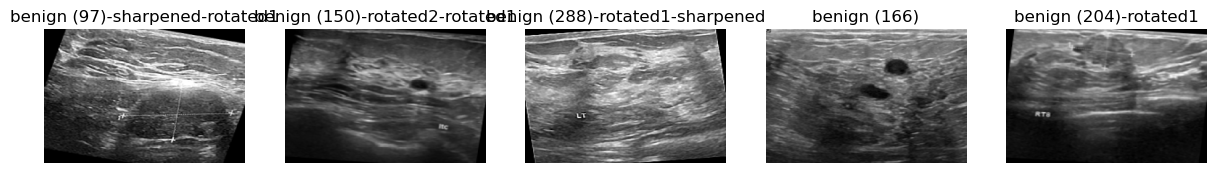


Random sample from the 'malignant' class:


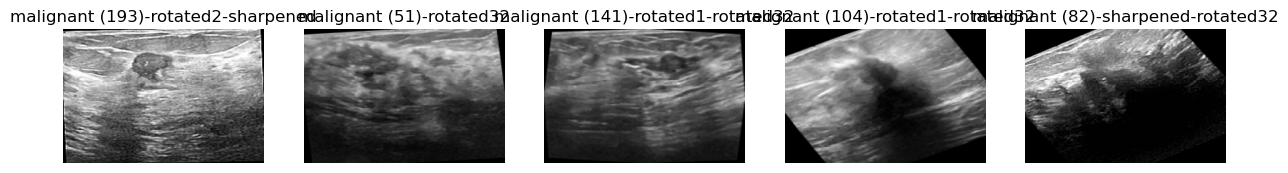

In [42]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


def display_random_sample(folder_path, num_samples=5):
    image_files = [filename for filename in os.listdir(folder_path) if filename.endswith(".jpg") or filename.endswith(".png")]
    random_samples = random.sample(image_files, num_samples)

    plt.figure(figsize=(15, 5))
    for i, filename in enumerate(random_samples):
        image_path = os.path.join(folder_path, filename)
        image = mpimg.imread(image_path)

        plt.subplot(1, num_samples, i+1)
        plt.imshow(image)
        plt.title(filename.split('.')[0])
        plt.axis('off')

    plt.show()

augmented_benign_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound breast classification/train/resized_benign/"
augmented_malignant_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound breast classification/train/resized_malignant/"


num_samples_to_display = 5
print("Random sample from the 'benign' class:")
display_random_sample(augmented_benign_directory, num_samples_to_display)

print("\nRandom sample from the 'malignant' class:")
display_random_sample(augmented_malignant_directory, num_samples_to_display)


In [4]:
import os
import random

def get_image_paths_and_labels(folder_path):
    image_files = [filename for filename in os.listdir(folder_path) if filename.endswith(".jpg") or filename.endswith(".png")]
    image_paths = [os.path.join(folder_path, filename) for filename in image_files]
    labels = [filename.split('-')[0] for filename in image_files]  
    return image_paths, labels

augmented_benign_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound breast classification/train/augmented_benign/"
augmented_malignant_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound breast classification/train/augmented_malignant/"

benign_image_paths, benign_labels = get_image_paths_and_labels(augmented_benign_directory)
malignant_image_paths, malignant_labels = get_image_paths_and_labels(augmented_malignant_directory)

all_image_paths = benign_image_paths + malignant_image_paths
all_labels = benign_labels + malignant_labels

from collections import Counter
class_counts = Counter(all_labels)

single_sample_classes = [label for label, count in class_counts.items() if count == 1]

filtered_image_paths = []
filtered_labels = []
for path, label in zip(all_image_paths, all_labels):
    if label not in single_sample_classes:
        filtered_image_paths.append(path)
        filtered_labels.append(label)

all_image_paths = filtered_image_paths
all_labels = filtered_labels

min_class_size = min(class_counts.values())

train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

if min_class_size < 2:
    val_ratio = min(2, val_ratio)
    test_ratio = min(2, test_ratio)
    train_ratio = 1.0 - val_ratio - test_ratio

x_train, x_temp, y_train, y_temp = train_test_split(all_image_paths, all_labels, test_size=(1 - train_ratio), stratify=all_labels, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=test_ratio/(test_ratio + val_ratio), stratify=y_temp, random_state=42)

print(f"Number of training samples: {len(x_train)}")
print(f"Number of validation samples: {len(x_val)}")
print(f"Number of test samples: {len(x_test)}")


Number of training samples: 26844
Number of validation samples: 5753
Number of test samples: 5753


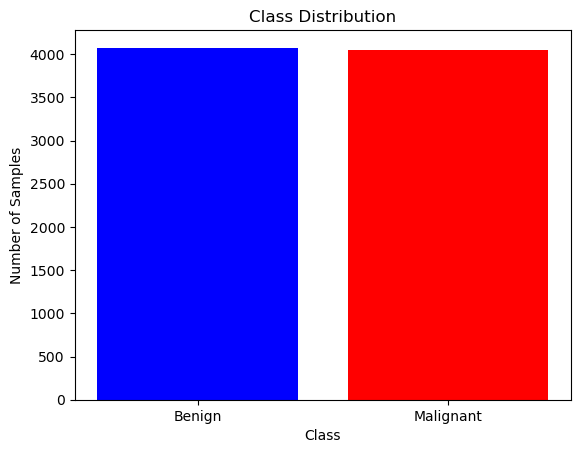

In [52]:
import os
import matplotlib.pyplot as plt

benign_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound breast classification/train/resized_benign/"
malignant_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound breast classification/train/resized_malignant/"

def count_samples_in_class(directory):
    return len(os.listdir(directory))

num_benign_samples = count_samples_in_class(benign_directory)
num_malignant_samples = count_samples_in_class(malignant_directory)

class_labels = ['Benign', 'Malignant']
class_counts = [num_benign_samples, num_malignant_samples]

plt.bar(class_labels, class_counts, color=['blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.show()



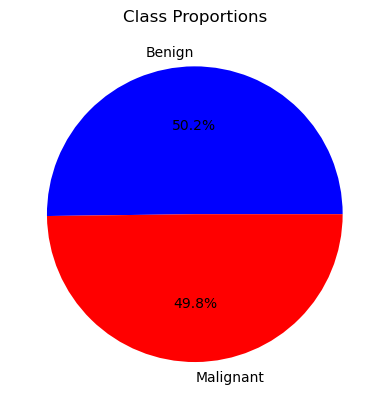

In [53]:
import os
import matplotlib.pyplot as plt

benign_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound breast classification/train/resized_benign/"
malignant_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound breast classification/train/resized_malignant/"

def count_samples_in_class(directory):
    return len(os.listdir(directory))

num_benign_samples = count_samples_in_class(benign_directory)
num_malignant_samples = count_samples_in_class(malignant_directory)

class_labels = ['Benign', 'Malignant']
class_counts = [num_benign_samples, num_malignant_samples]

plt.pie(class_counts, labels=class_labels, autopct='%1.1f%%', colors=['blue', 'red'])
plt.title('Class Proportions')
plt.show()


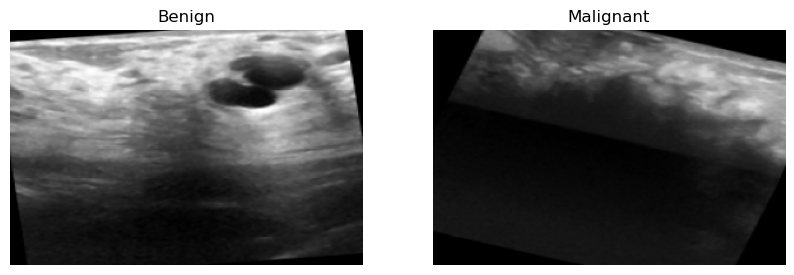

In [51]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

def get_image_paths(directory):
    image_paths = [os.path.join(directory, filename) for filename in os.listdir(directory) 
                   if filename.endswith(".jpg") or filename.endswith(".png")]
    return image_paths


augmented_benign_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound breast classification/train/resized_benign/"
augmented_malignant_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound breast classification/train/resized_malignant/"

benign_image_paths = get_image_paths(augmented_benign_directory)
malignant_image_paths = get_image_paths(augmented_malignant_directory)

random_benign_image = random.choice(benign_image_paths)
random_malignant_image = random.choice(malignant_image_paths)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(Image.open(random_benign_image))
axes[0].set_title('Benign')
axes[0].axis('off')

axes[1].imshow(Image.open(random_malignant_image))
axes[1].set_title('Malignant')
axes[1].axis('off')

plt.show()



**Checking the Accuracy:**

**Creating the Ground Truth Data for Pre-existing Data:**

This dataset does not have ground truth data or annottaions. The abscence of ground truth data can pose challanges and limitaions for certain types of data anlysis and machine learning tasks. In the following step the ground truth will be introduced to the dataset in the foramt of CSV.

In [55]:
import os
import pandas as pd

benign_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound breast classification/train/resized_benign/"
malignant_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound breast classification/train/resized_malignant/"

image_filenames = []
labels = []

for filename in os.listdir(benign_directory):
    image_path = os.path.join(benign_directory, filename)
    image_filenames.append(image_path)
    labels.append("benign")

for filename in os.listdir(malignant_directory):
    image_path = os.path.join(malignant_directory, filename)
    image_filenames.append(image_path)
    labels.append("malignant")

data = pd.DataFrame({"Image Filename": image_filenames, "Label": labels})

print(data)


                                         Image Filename      Label
0     /Users/alirazi/BreastCancerUltrasound/data/ult...     benign
1     /Users/alirazi/BreastCancerUltrasound/data/ult...     benign
2     /Users/alirazi/BreastCancerUltrasound/data/ult...     benign
3     /Users/alirazi/BreastCancerUltrasound/data/ult...     benign
4     /Users/alirazi/BreastCancerUltrasound/data/ult...     benign
...                                                 ...        ...
8111  /Users/alirazi/BreastCancerUltrasound/data/ult...  malignant
8112  /Users/alirazi/BreastCancerUltrasound/data/ult...  malignant
8113  /Users/alirazi/BreastCancerUltrasound/data/ult...  malignant
8114  /Users/alirazi/BreastCancerUltrasound/data/ult...  malignant
8115  /Users/alirazi/BreastCancerUltrasound/data/ult...  malignant

[8116 rows x 2 columns]


In [56]:
import os
print(os.getcwd())


/Users/alirazi/BreastCancerUltrasound


In [57]:
import os
import cv2  



benign_directory =  "/Users/alirazi/BreastCancerUltrasound/data/ultrasound breast classification/train/resized_benign/"
malignant_directory =  "/Users/alirazi/BreastCancerUltrasound/data/ultrasound breast classification/train/resized_malignant/"

ground_truth_attributes = []
extracted_attributes = []

def extract_features(image):
   
    pass


for filename in os.listdir(benign_directory):
    image_path = os.path.join(benign_directory, filename)
    image = cv2.imread(image_path)  
    preprocessed_image = preprocess_image(image) 
    attributes = extract_features(preprocessed_image)  
    ground_truth_attributes.append(ground_truth_value_for_image) 
    extracted_attributes.append(attributes)

for filename in os.listdir(malignant_directory):
    image_path = os.path.join(malignant_directory, filename)
    image = cv2.imread(image_path) 
    preprocessed_image = preprocess_image(image) 
    attributes = extract_features(preprocessed_image) 
    ground_truth_attributes.append(ground_truth_value_for_image)
    extracted_attributes.append(attributes)

ground_truth_attributes = np.array(ground_truth_attributes)
extracted_attributes = np.array(extracted_attributes)

print("Ground Truth Attributes:")
print(ground_truth_attributes)

print("Extracted Attributes:")
print(extracted_attributes)


NameError: name 'preprocess_image' is not defined

After having ground truth data, this provided to check **Obtain Ground Truth Data**. The Ground truth data represents the accurate and reliable reference values for the attributes.